# Importa libs

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fast_ml.model_development import train_valid_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)

# Carrega dataset

In [12]:
df = pd.read_csv('../data/raw/BoraBusTratado.csv')
df

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
0,70172,Masculino,Sim,13,TurismoOuPessoal,Comforto,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Nao
1,5047,Masculino,Nao,25,NegociosOuTrabalho,Leito,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Nao
2,110028,Feminino,Sim,26,NegociosOuTrabalho,Leito,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Sim
3,24026,Feminino,Sim,25,NegociosOuTrabalho,Leito,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Nao
4,119299,Masculino,Sim,61,NegociosOuTrabalho,Leito,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Feminino,Nao,23,NegociosOuTrabalho,Normal,120.0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,Nao
103900,73097,Masculino,Sim,49,NegociosOuTrabalho,Leito,1467.0,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,Sim
103901,68825,Masculino,Nao,30,NegociosOuTrabalho,Leito,1247.0,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,Nao
103902,54173,Feminino,Nao,22,NegociosOuTrabalho,Normal,625.0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,Nao


# EDA

In [13]:
df.isna().sum()

ID                           0
Genero                       0
PlanoFidelidade              0
Idade                        0
RazaoViagem                  0
CategoriaPassagem            0
DistanciaKm                  0
WiFi                         0
ConvenienciaHorarios         0
FacilidadeReservaViaApp      0
PontosLocalizacao            0
Alimentacao                  0
CheckInViaApp                0
ConfortoInterno              0
Entretenimento               0
ServicosIntegracao           0
SalaDeEspera                 0
Bagagem                      0
ServicoCheckIn               0
ServicoDeBordo               0
Limpeza&Higiene              0
AtrasoNaSaida                0
AtrasoNaChegada            310
SatisfacaoGeral              0
dtype: int64

In [14]:
df.AtrasoNaChegada.value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: AtrasoNaChegada, Length: 455, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distrubuição de Frequências'}, xlabel='AtrasoNaChegada', ylabel='Density'>

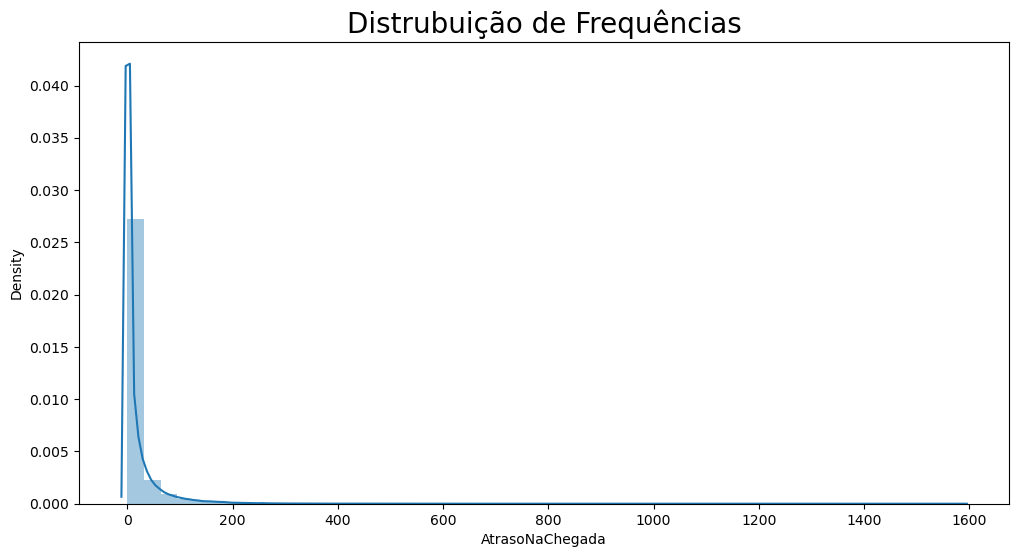

In [22]:
ax = sns.distplot(df['AtrasoNaChegada'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax

In [25]:
# ax = sns.pairplot(df)

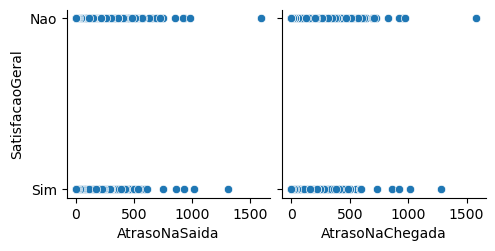

In [26]:
ax = sns.pairplot(df, y_vars='SatisfacaoGeral', x_vars=['AtrasoNaSaida', 'AtrasoNaChegada'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SatisfacaoGeral', ylabel='count'>

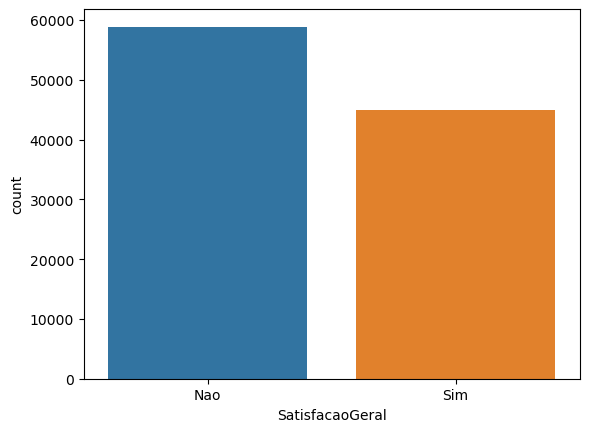

In [23]:
sns.countplot(df['SatisfacaoGeral'])

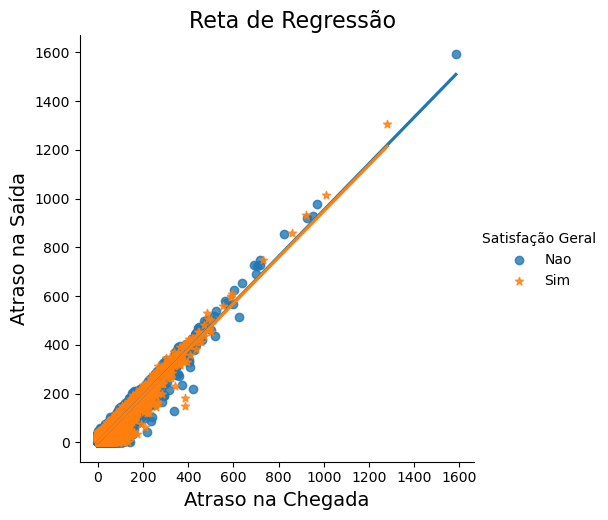

In [28]:
ax = sns.lmplot(x="AtrasoNaChegada", y="AtrasoNaSaida", data=df, hue="SatisfacaoGeral", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão', fontsize=16, y=1.02)
ax.set_xlabels("Atraso na Chegada", fontsize=14)
ax.set_ylabels("Atraso na Saída", fontsize=14)
ax.add_legend(title="Satisfação Geral")
ax

<AxesSubplot:>

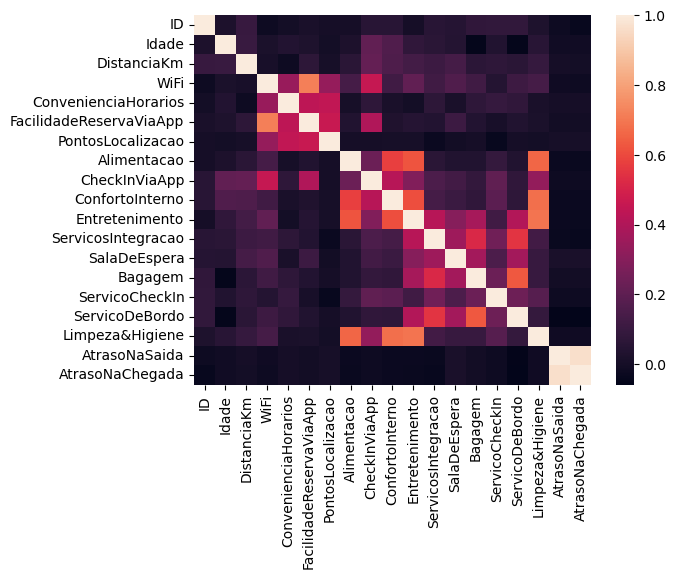

In [32]:
corr = df.corr()
sns.heatmap(corr)

In [33]:
df.describe(include='object')

,Genero,PlanoFidelidade,RazaoViagem,CategoriaPassagem,SatisfacaoGeral
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Feminino,Sim,NegociosOuTrabalho,Leito,Nao
freq,52727,84923,71655,49665,58879


In [35]:
df.describe()

,ID,Idade,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,743.397415,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,623.222871,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,259.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,527.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1089.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,3114.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


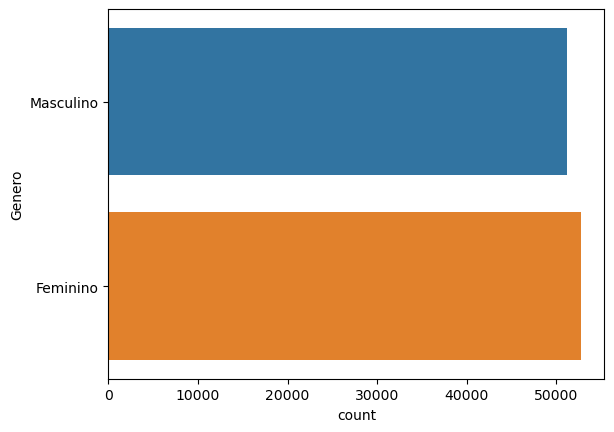

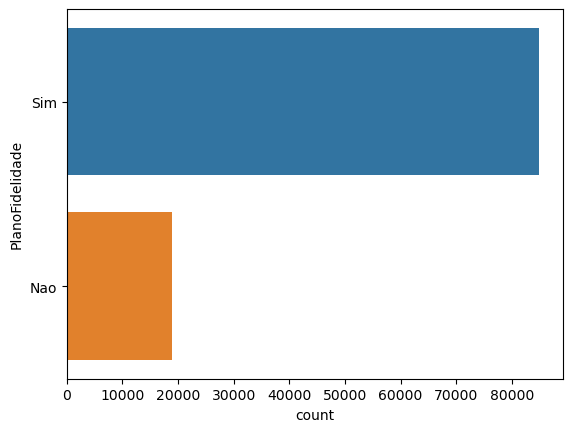

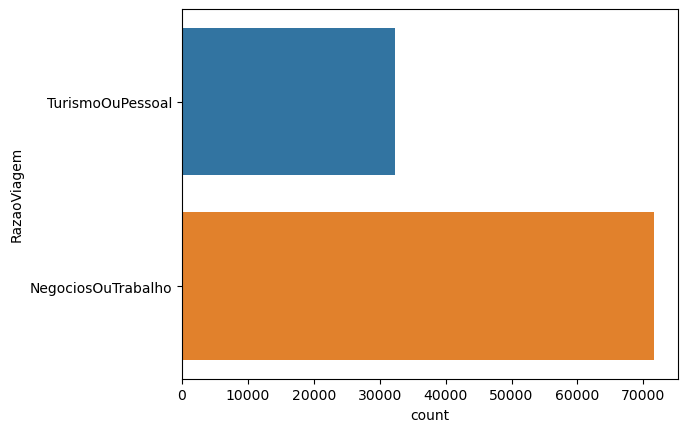

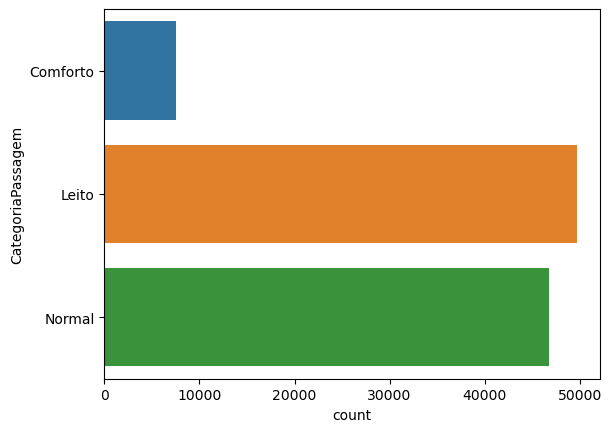

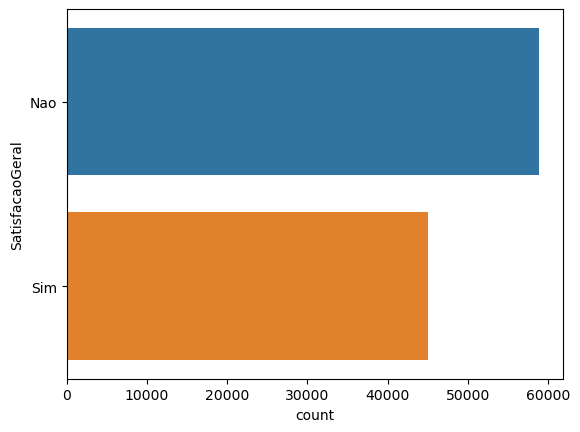

In [37]:
for col in df.select_dtypes(include='object'):
    sns.countplot(y=col, data=df)
    plt.show()

In [43]:
cat_cols = ['Genero','PlanoFidelidade','RazaoViagem','CategoriaPassagem','SatisfacaoGeral']
num_cols = df.drop(columns=cat_cols)

In [44]:
cat_cols

['Genero',
 'PlanoFidelidade',
 'RazaoViagem',
 'CategoriaPassagem',
 'SatisfacaoGeral']

In [45]:
num_cols

,ID,Idade,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada
0,70172,13,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,5047,25,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,110028,26,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,24026,25,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,119299,61,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,120.0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,73097,49,1467.0,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,68825,30,1247.0,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,54173,22,625.0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


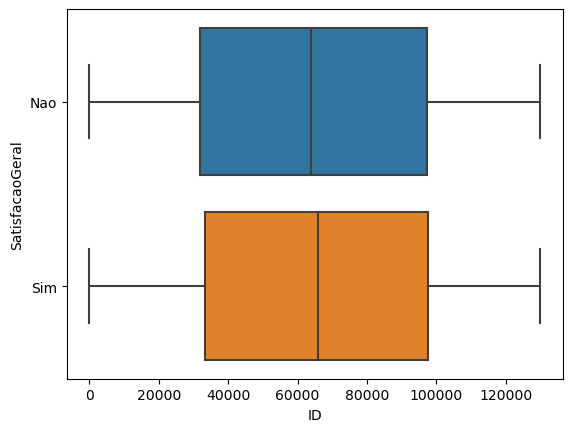

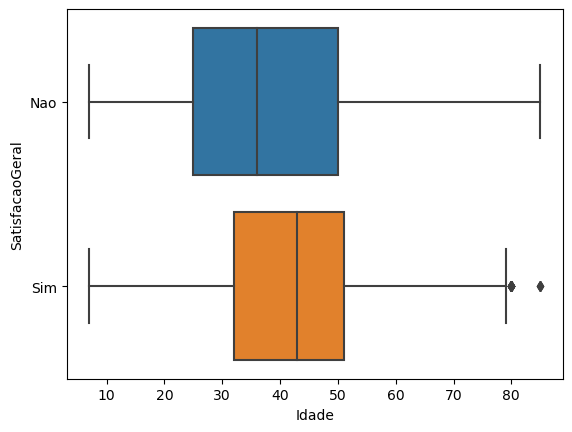

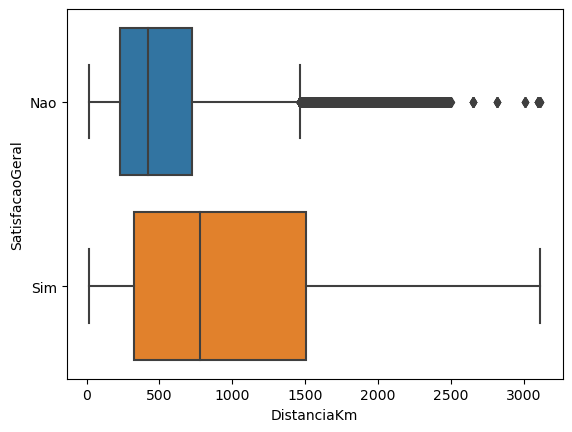

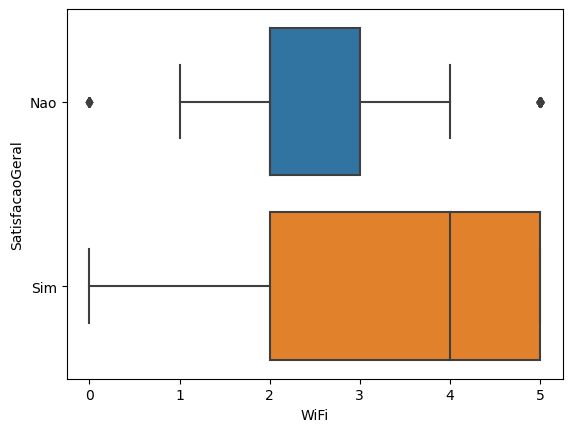

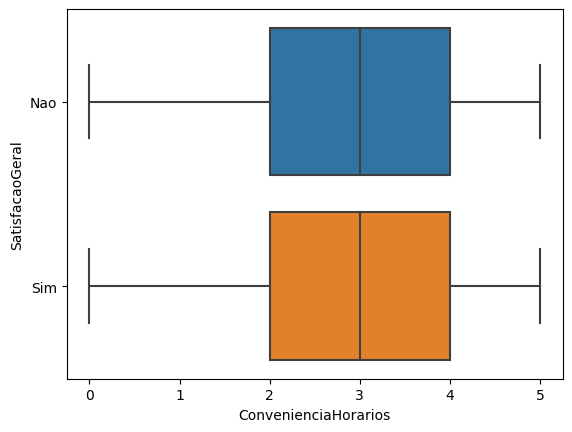

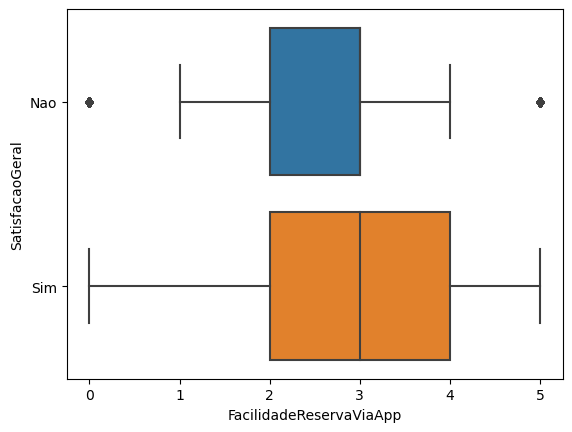

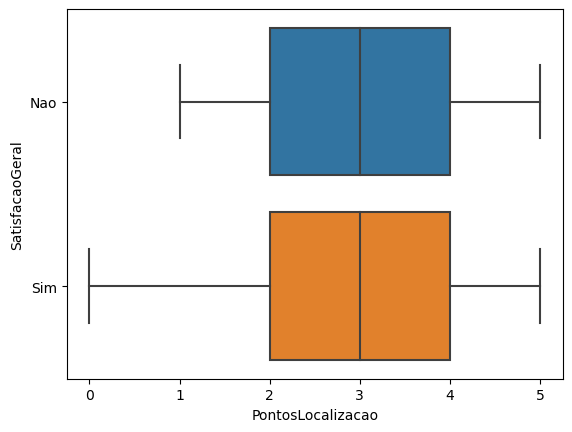

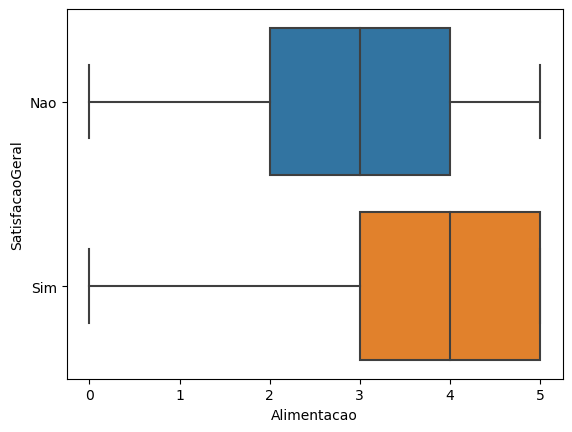

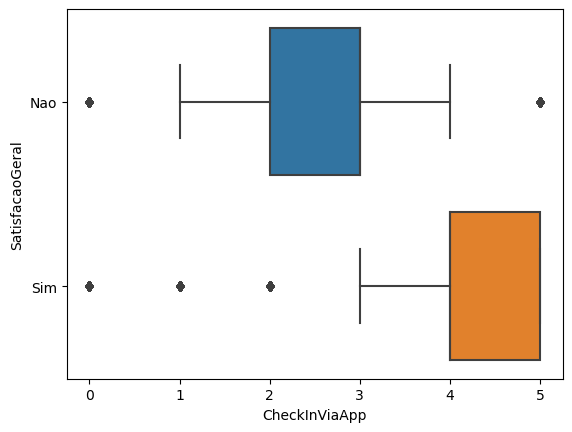

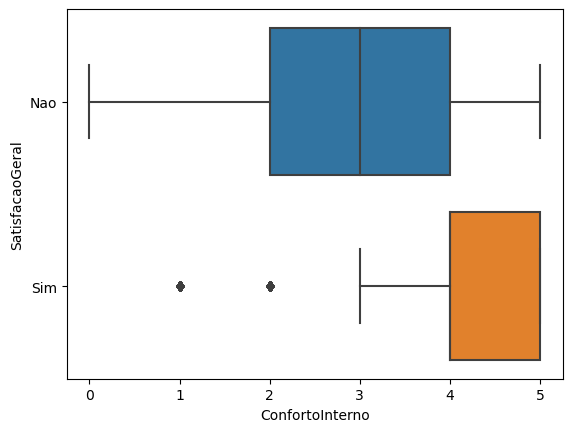

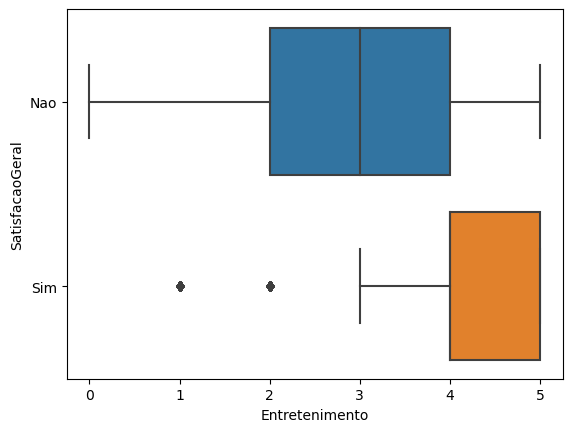

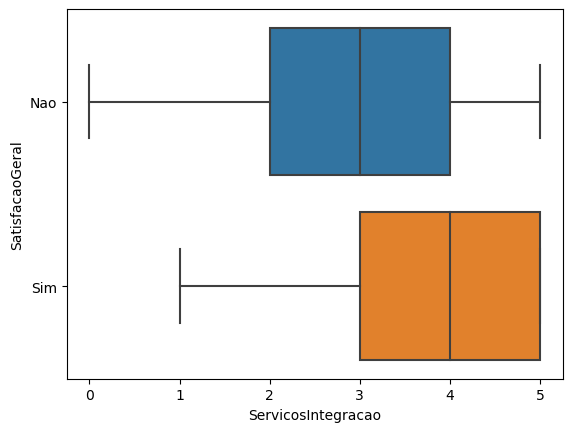

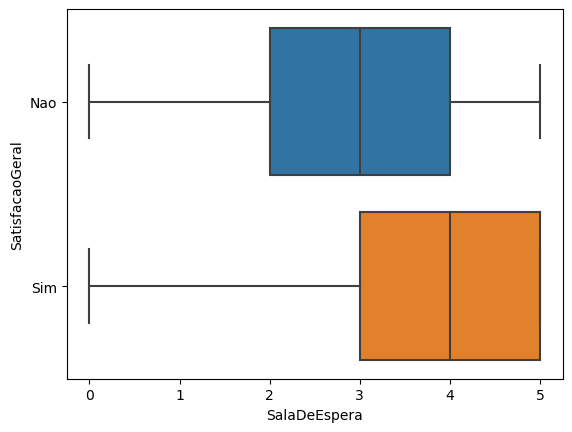

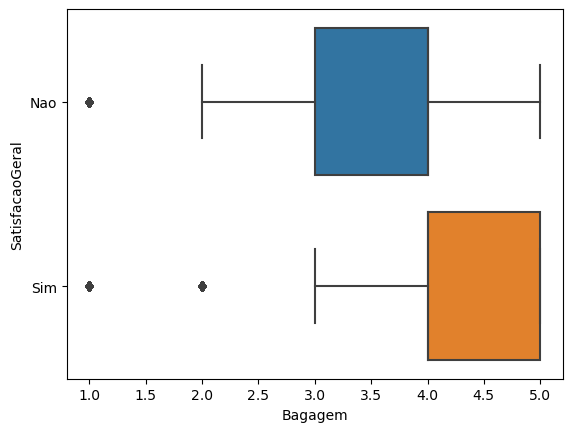

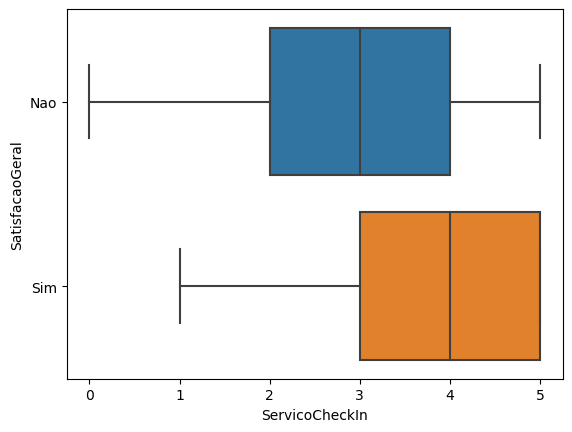

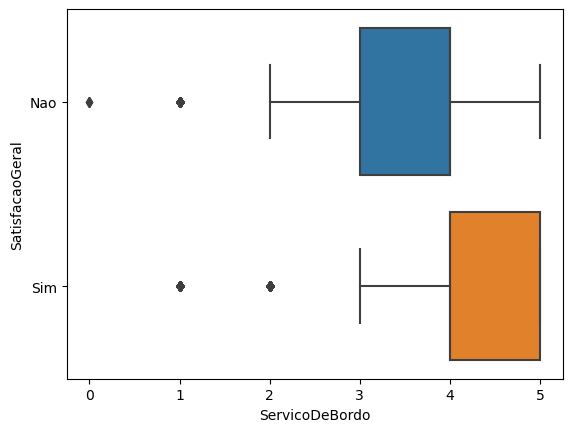

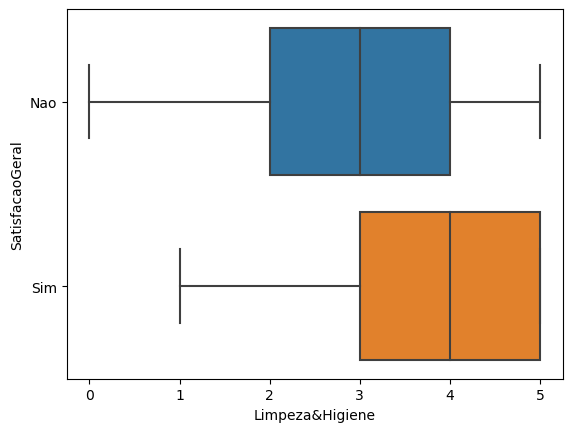

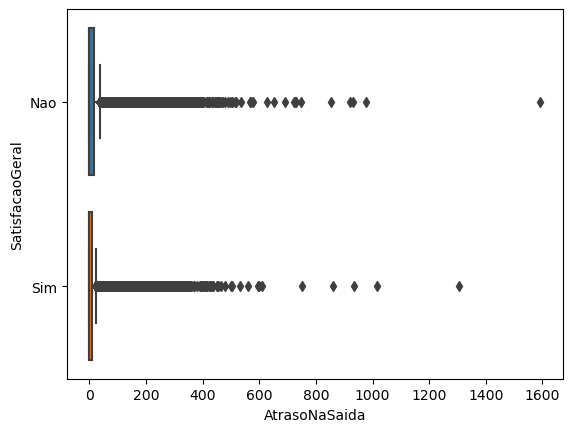

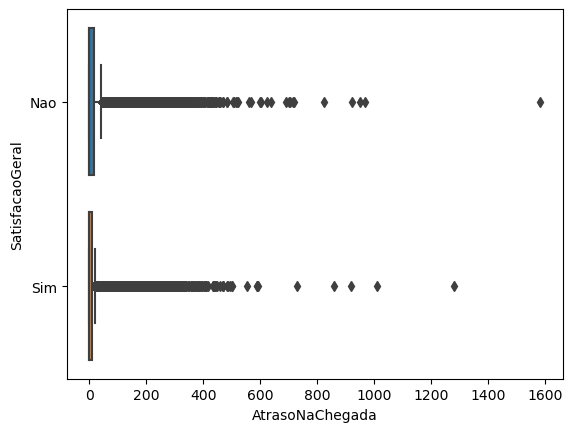

In [46]:
for col in num_cols:
    sns.boxplot(y = df['SatisfacaoGeral'].astype('category'), x = col, data=df)
    plt.show()

In [47]:
for col in df.select_dtypes(include='object'):
    display(pd.crosstab(df['SatisfacaoGeral'], df[col], normalize='index'))
    #display(pd.crosstab(data['target'], data[col]))

Genero,Feminino,Masculino
SatisfacaoGeral,,
Nao,0.512797,0.487203
Sim,0.500478,0.499522


PlanoFidelidade,Nao,Sim
SatisfacaoGeral,,
Nao,0.246081,0.753919
Sim,0.099767,0.900233


RazaoViagem,NegociosOuTrabalho,TurismoOuPessoal
SatisfacaoGeral,,
Nao,0.507974,0.492026
Sim,0.927174,0.072826


CategoriaPassagem,Comforto,Leito,Normal
SatisfacaoGeral,,,
Nao,0.095960,0.257902,0.646139
Sim,0.040955,0.765797,0.193248


SatisfacaoGeral,Nao,Sim
SatisfacaoGeral,,
Nao,1.0,0.0
Sim,0.0,1.0


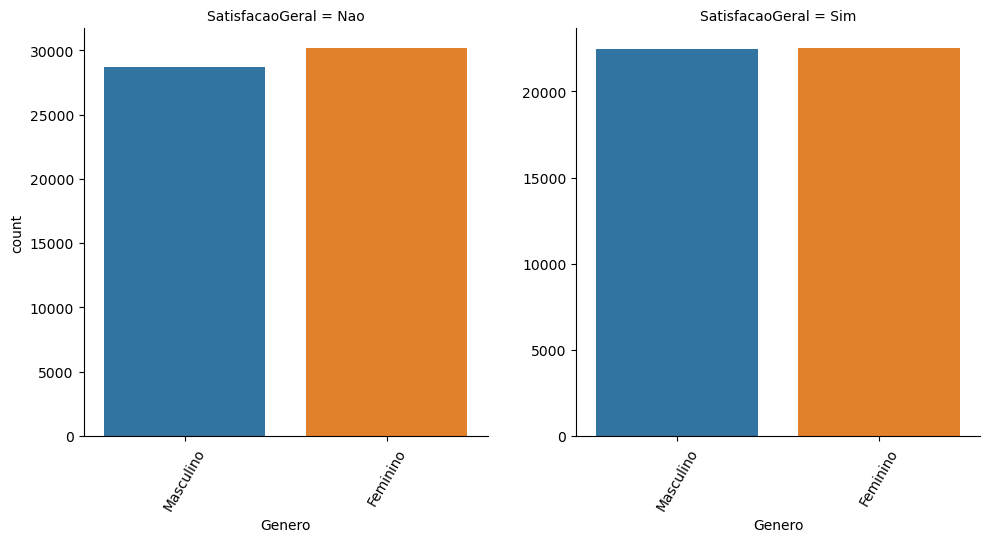

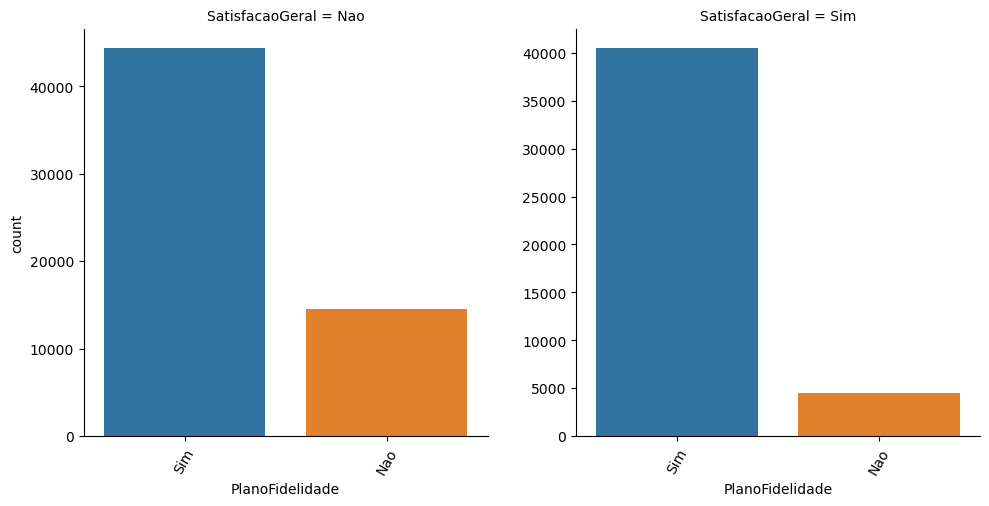

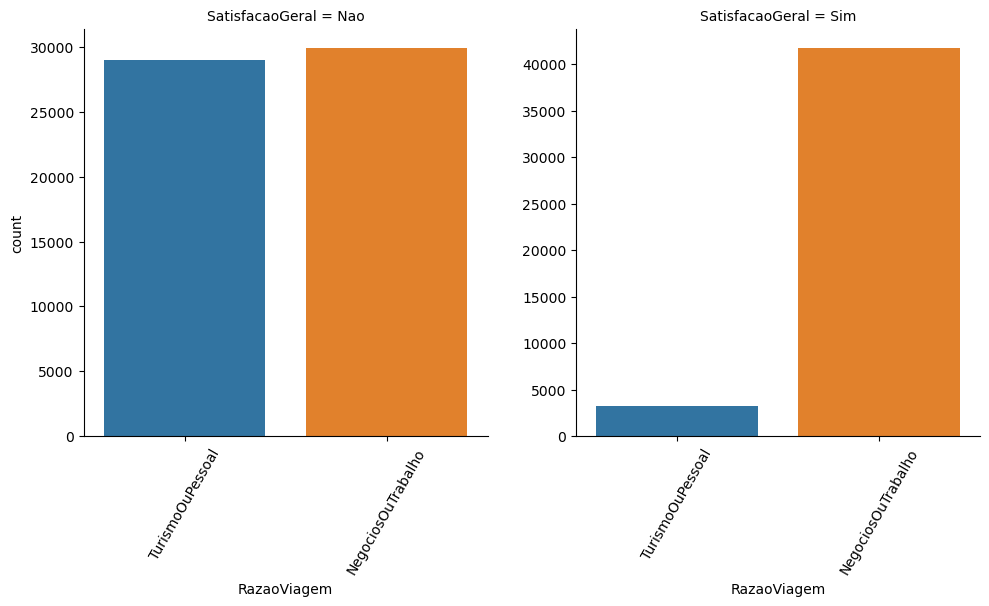

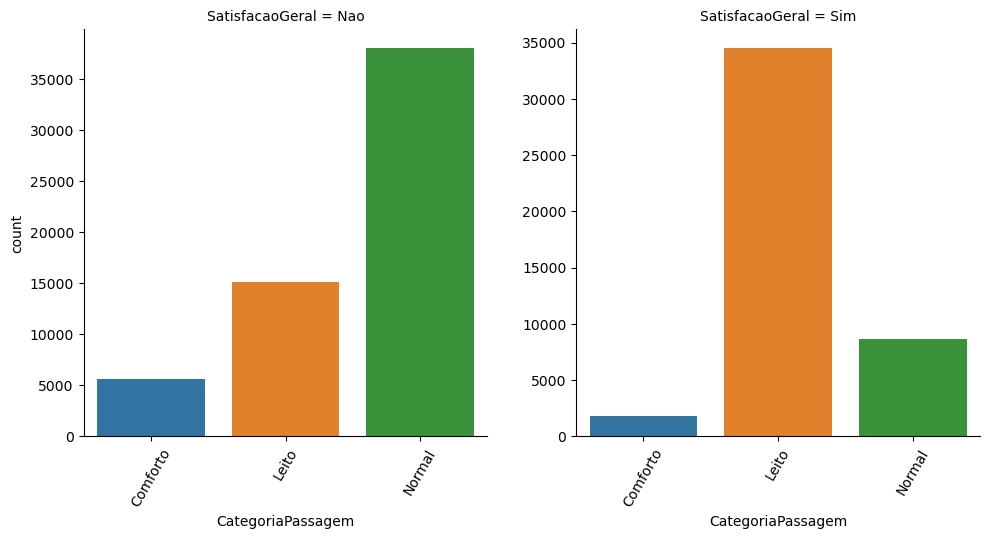

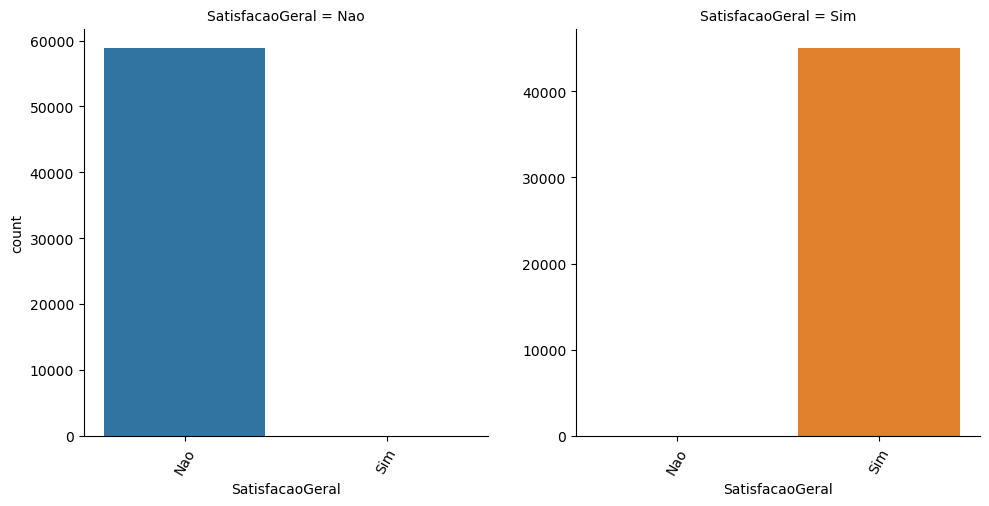

In [48]:
for col in df.select_dtypes(include='object'):
    g = sns.catplot(x = col, kind='count', col = 'SatisfacaoGeral', data=df, sharey=False)
    g.set_xticklabels(rotation=60)

In [49]:
df[df['AtrasoNaChegada'].isna()]

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
213,49608,Feminino,Sim,38,NegociosOuTrabalho,Normal,68.0,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,Sim
1124,73442,Masculino,Sim,53,TurismoOuPessoal,Normal,632.0,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,Nao
1529,71178,Masculino,Sim,39,NegociosOuTrabalho,Leito,458.0,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,Nao
2004,72940,Feminino,Nao,26,NegociosOuTrabalho,Leito,647.0,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,Nao
2108,116374,Feminino,Sim,24,TurismoOuPessoal,Normal,261.0,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Masculino,Sim,49,TurismoOuPessoal,Comforto,781.0,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,Nao
102384,71241,Masculino,Sim,58,NegociosOuTrabalho,Normal,458.0,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,Nao
102552,27684,Feminino,Nao,29,NegociosOuTrabalho,Normal,692.0,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,Nao
102960,36787,Masculino,Sim,58,NegociosOuTrabalho,Normal,680.0,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,Sim


# Split

In [53]:
df.shape

(103904, 24)

In [51]:
df_teste_final = df.sample(frac=0.1)
df_teste_final

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
90108,51236,Masculino,Sim,52,NegociosOuTrabalho,Comforto,98.0,5,2,2,2,5,5,5,5,2,2,2,1,3,5,0,0.0,Sim
69964,9634,Masculino,Nao,23,NegociosOuTrabalho,Leito,124.0,4,0,4,4,2,4,2,2,4,4,5,4,4,2,0,0.0,Sim
16281,109370,Masculino,Sim,10,NegociosOuTrabalho,Leito,1141.0,2,2,2,2,2,2,2,2,1,3,3,4,3,2,20,0.0,Nao
25248,58269,Feminino,Sim,56,NegociosOuTrabalho,Leito,1756.0,4,4,4,4,2,4,4,5,5,5,5,4,5,3,11,25.0,Sim
56371,118810,Feminino,Sim,30,TurismoOuPessoal,Normal,388.0,3,4,3,5,4,3,4,4,4,5,5,5,4,4,0,0.0,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7952,23880,Masculino,Nao,16,NegociosOuTrabalho,Normal,368.0,3,0,4,5,2,4,2,2,3,5,4,5,2,2,0,0.0,Nao
63085,758,Feminino,Nao,20,NegociosOuTrabalho,Normal,84.0,4,4,4,2,2,4,2,2,3,3,5,3,4,2,34,21.0,Nao
30828,39588,Feminino,Sim,8,NegociosOuTrabalho,Leito,1989.0,2,5,5,5,2,2,2,2,4,2,3,2,3,2,0,0.0,Nao
79440,113899,Feminino,Sim,29,NegociosOuTrabalho,Normal,1434.0,3,4,4,4,3,3,3,3,1,5,3,3,3,3,6,2.0,Nao


In [56]:
df_modelagem = df.drop(df_teste_final.index)
df_modelagem

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
0,70172,Masculino,Sim,13,TurismoOuPessoal,Comforto,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Nao
1,5047,Masculino,Nao,25,NegociosOuTrabalho,Leito,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Nao
2,110028,Feminino,Sim,26,NegociosOuTrabalho,Leito,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Sim
3,24026,Feminino,Sim,25,NegociosOuTrabalho,Leito,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Nao
4,119299,Masculino,Sim,61,NegociosOuTrabalho,Leito,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,60666,Masculino,Sim,50,TurismoOuPessoal,Normal,1012.0,3,1,3,4,2,3,2,2,4,3,4,2,4,2,0,0.0,Nao
103899,94171,Feminino,Nao,23,NegociosOuTrabalho,Normal,120.0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,Nao
103900,73097,Masculino,Sim,49,NegociosOuTrabalho,Leito,1467.0,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,Sim
103902,54173,Feminino,Nao,22,NegociosOuTrabalho,Normal,625.0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,Nao


In [60]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_modelagem, target = 'SatisfacaoGeral', 
                                                                            train_size=0.6, valid_size=0.15, test_size=0.15)

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(56108, 23)
(56108,)
(18703, 23)
(18703,)
(18703, 23)
(18703,)
